[Task 1](#task-1)



[Task 2](#task-2)

In [ ]:
#importing relevant libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

In [ ]:
#open up csv file

london_df = pd.read_csv('London.csv')
london_df.head(5)

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [3]:
#looking at the shape - rows and columns 
london_df.shape

(3480, 11)

In [4]:
#shows the amount of non-null values in each column and its data type
london_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [5]:
#shows how many null values per column 
london_df.isnull().sum()

Unnamed: 0             0
Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

In [6]:
#dropping column - unnamed: doesn't prove any value to our analysis

london_df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
#checking to see if change has been implemented
london_df.isnull().sum()

Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

In [8]:
#things to do for this part: 
#check for potential inconsistencies in categorical data and outliners

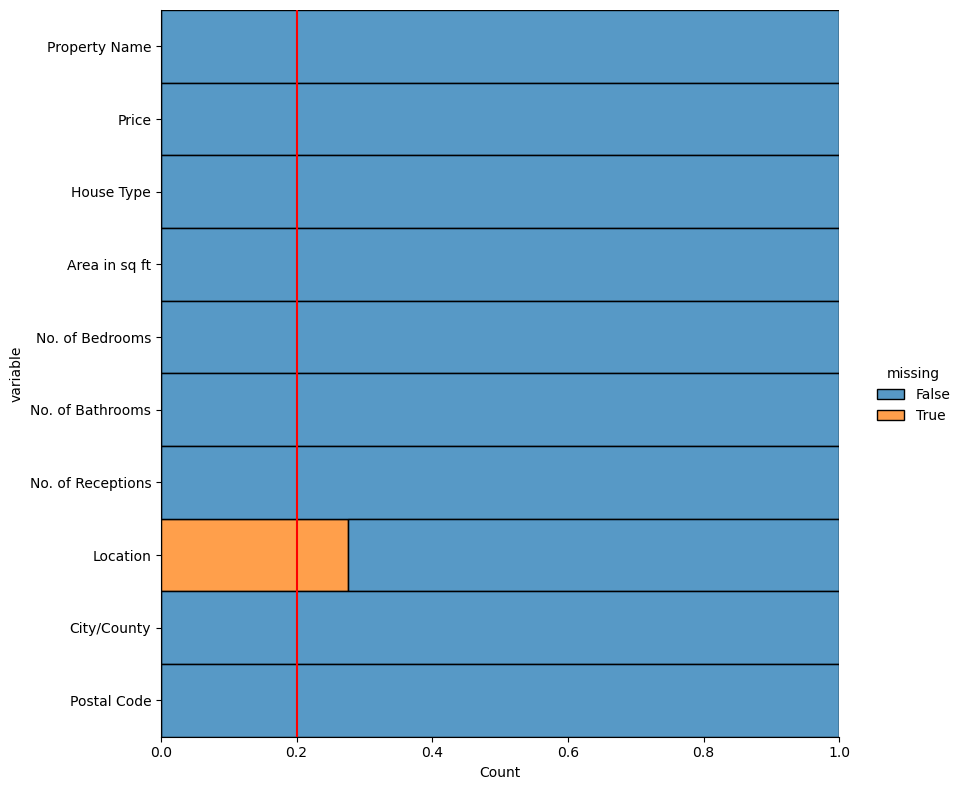

In [8]:
#visualising the null/non-null values across different columns
sns.displot(
    data = london_df.isnull().melt(value_name='missing'),
    y ='variable',
    hue='missing',
    multiple='fill', 
    height=8,
    aspect=1.1
)

#specifying a threshold value 
plt.axvline(0.2, color='r')

In [9]:
#dropping null values in location - due to the nature of the dataset and the amount of null values - imputation is not possible and doesn't make sense

new_ldndf = london_df.dropna()
new_ldndf.isnull().sum()

Property Name        0
Price                0
House Type           0
Area in sq ft        0
No. of Bedrooms      0
No. of Bathrooms     0
No. of Receptions    0
Location             0
City/County          0
Postal Code          0
dtype: int64

In [10]:
#checking for duplicates in the dataframe

duplicates = new_ldndf.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 3


In [11]:
#drop the duplicated rows
ldn_df = new_ldndf.drop_duplicates()

In [12]:
house_types = ldn_df['House Type'].unique()
print(house_types)

['House' 'Flat / Apartment' 'New development' 'Penthouse' 'Studio'
 'Bungalow' 'Duplex' 'Mews']


In [13]:
ldn_df.head(15)

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
7,Bishops Gate,650000,New development,560,1,1,1,Fulham,London,SW6 3LF
11,Cromwell Avenue,2500000,House,2974,6,6,6,Highgate,London,N6 5HQ
12,Ashley Park Avenue,2795000,House,5294,5,5,5,Walton-on-Thames,Surrey,KT12 1ER
13,Grove End House,725000,Flat / Apartment,778,2,2,2,St. John's Wood,London,NW8 9HP
14,Abercorn Mansions,750000,Flat / Apartment,647,2,2,2,17 Abercorn Place,London,NW8 9DY


In [14]:
#using regex to remove rows with numbers in 'Location' column
ldn_df = ldn_df[~ldn_df['Location'].str.contains(r'\d', na=False)]

In [15]:
#renaming entries in the 'house type' columns to include captialisation

ldn_df['House Type'] = ldn_df['House Type'].replace({'New development': 'New Development'})

In [16]:
#checking for changes
ldn_df.head(15)

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
7,Bishops Gate,650000,New Development,560,1,1,1,Fulham,London,SW6 3LF
11,Cromwell Avenue,2500000,House,2974,6,6,6,Highgate,London,N6 5HQ
12,Ashley Park Avenue,2795000,House,5294,5,5,5,Walton-on-Thames,Surrey,KT12 1ER
13,Grove End House,725000,Flat / Apartment,778,2,2,2,St. John's Wood,London,NW8 9HP
15,Chester Terrace,12500000,House,4596,6,6,6,Regents Park,London,NW1 4ND


In [17]:
#checking for outliners within the numerical data columns

ldn_df.describe()[['Price', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions']]

,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,2.276000e+03,2276.000000,2276.000000,2276.000000,2276.000000
mean,1.895811e+06,1829.587434,3.228910,3.228910,3.228910
std,2.326342e+06,1511.907418,1.554255,1.554255,1.554255
min,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,7.500000e+05,869.750000,2.000000,2.000000,2.000000
50%,1.250000e+06,1371.000000,3.000000,3.000000,3.000000
75%,2.250000e+06,2316.000000,4.000000,4.000000,4.000000
max,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


#### Typically, all data points that are +3 or -3 standard deviations away from the mean of the column are considered outliners

##### I will apply this formula to all of the numerical columns to maintain data consistency and validity 

In [18]:
#filtering outliners for the price column
upper_limit_price = ldn_df['Price'].mean() + 3 * ldn_df['Price'].std()
lower_limit_price = ldn_df['Price'].mean() - 3 * ldn_df['Price'].std()
updated_df = ldn_df[(ldn_df['Price'] >= lower_limit_price) & (ldn_df['Price'] <= upper_limit_price)]

#filtering outliners for the area in sq ft column
upper_limit_area = updated_df['Area in sq ft'].mean() + 3 * updated_df['Area in sq ft'].std()
lower_limit_area = updated_df['Area in sq ft'].mean() - 3 * updated_df['Area in sq ft'].std()
updated_df = updated_df[(updated_df['Area in sq ft'] >= lower_limit_area) & (updated_df['Area in sq ft'] <= upper_limit_area)]

#filtering outliners for the no of bedrooms column
upper_limit_bedrooms = updated_df['No. of Bedrooms'].mean() + 3 * updated_df['No. of Bedrooms'].std()
lower_limit_bedrooms = updated_df['No. of Bedrooms'].mean() - 3 * updated_df['No. of Bedrooms'].std()
updated_df = updated_df[(updated_df['No. of Bedrooms'] >= lower_limit_bedrooms) & (updated_df['No. of Bedrooms'] <= upper_limit_bedrooms)]

#filtering outliners for no of bathrooms column

upper_limit_bathrooms = updated_df['No. of Bathrooms'].mean() + 3 * updated_df['No. of Bathrooms'].std()
lower_limit_bathrooms = updated_df['No. of Bathrooms'].mean() - 3 * updated_df['No. of Bathrooms'].std()
updated_df = updated_df[(updated_df['No. of Bathrooms'] >= lower_limit_bathrooms) & (updated_df['No. of Bathrooms'] <= upper_limit_bathrooms)]

#filtering outliners for no of receptions column

upper_limit_reception = updated_df['No. of Receptions'].mean() + 3 * updated_df['No. of Receptions'].std()
lower_limit_reception = updated_df['No. of Receptions'].mean() - 3 * updated_df['No. of Receptions'].std()
updated_df = updated_df[(updated_df['No. of Receptions'] >= lower_limit_reception) & (updated_df['No. of Receptions'] <= upper_limit_reception)]

In [19]:
updated_df.shape

(2201, 10)

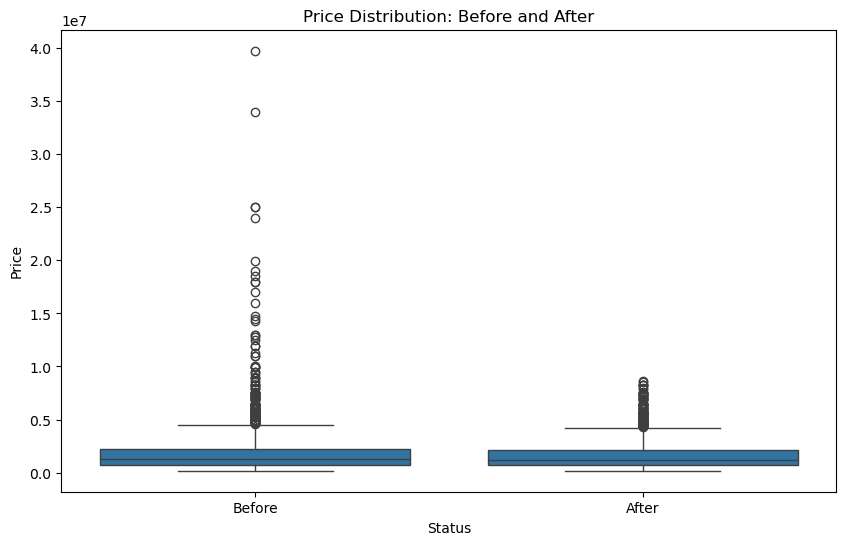

In [21]:
#visualising data distribution in the column 'Price'

ldn_df['Status'] = 'Before'
updated_df['Status'] = 'After'

#combining dataframes to compare
comparison_df = pd.concat([ldn_df[['Price', 'Status']], updated_df[['Price', 'Status']]])

plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Status', y='Price').set(title='Price Distribution: Before and After')
plt.xlabel('Status')
plt.ylabel('Price')
plt.show()

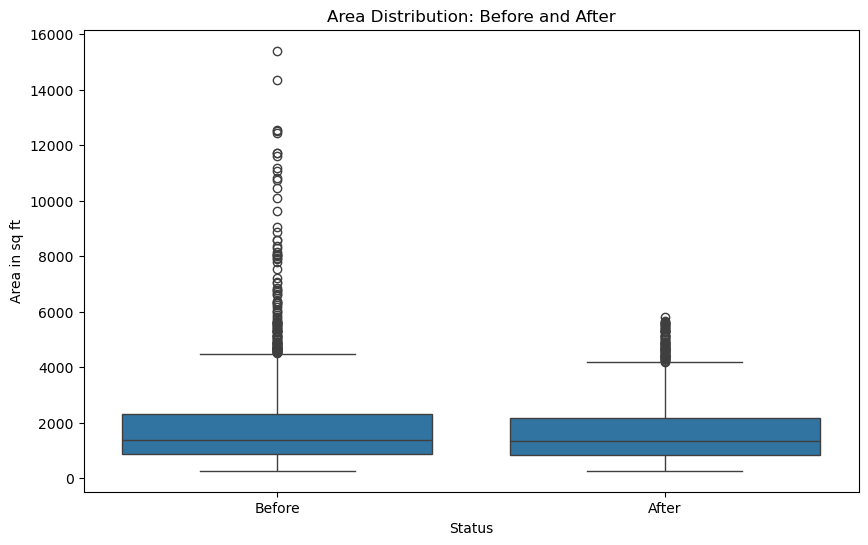

In [22]:
#visualising data distribution in the column 'Area in sq ft'

ldn_df['Status'] = 'Before'
updated_df['Status'] = 'After'

#combining dataframe to compare
comparison_df = pd.concat([ldn_df[['Area in sq ft', 'Status']], updated_df[['Area in sq ft', 'Status']]])

plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Status', y='Area in sq ft').set(title='Area Distribution: Before and After')
plt.xlabel('Status')
plt.ylabel('Area in sq ft')
plt.show()

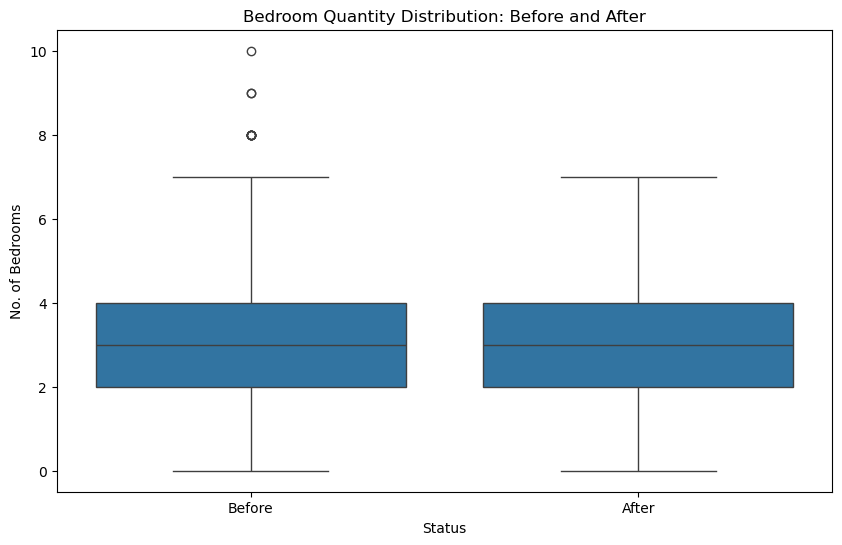

In [23]:
#visualising data distribution in the column 'No of Bedrooms'

ldn_df['Status'] = 'Before'
updated_df['Status'] = 'After'

#combining dataframe to compare
comparison_df = pd.concat([ldn_df[['No. of Bedrooms', 'Status']], updated_df[['No. of Bedrooms', 'Status']]])

plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Status', y='No. of Bedrooms').set(title='Bedroom Quantity Distribution: Before and After')
plt.xlabel('Status')
plt.ylabel('No. of Bedrooms')
plt.show()

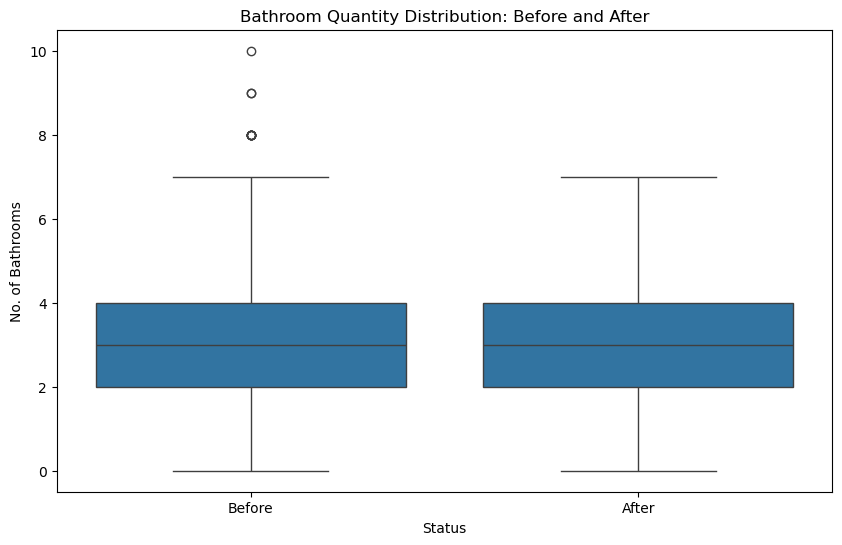

In [24]:
#visualising data distribution in the column 'No of Bathrooms'

ldn_df['Status'] = 'Before'
updated_df['Status'] = 'After'

#combining dataframe to compare
comparison_df = pd.concat([ldn_df[['No. of Bathrooms', 'Status']], updated_df[['No. of Bathrooms', 'Status']]])

plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Status', y='No. of Bathrooms').set(title='Bathroom Quantity Distribution: Before and After')
plt.xlabel('Status')
plt.ylabel('No. of Bathrooms')
plt.show()

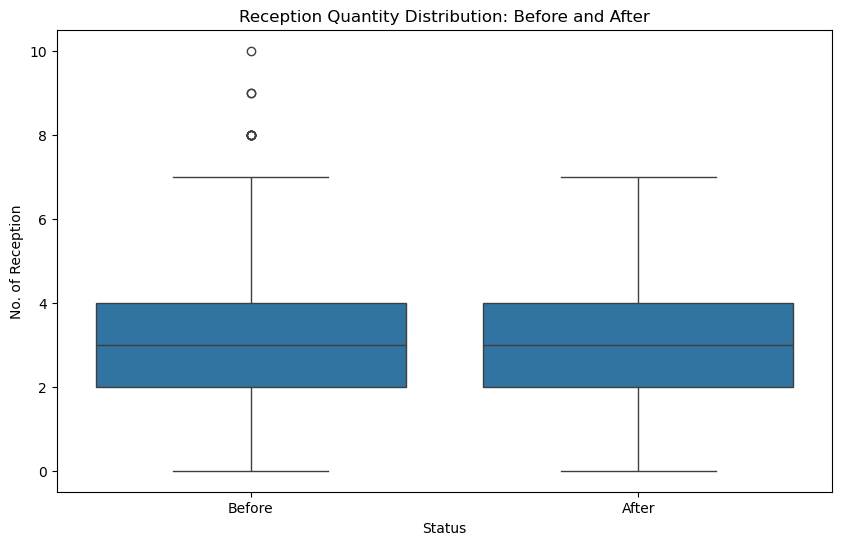

In [25]:
#visualising data distribution in the column 'No of Receptions'

ldn_df['Status'] = 'Before'
updated_df['Status'] = 'After'

#combining dataframe to compare
comparison_df = pd.concat([ldn_df[['No. of Receptions', 'Status']], updated_df[['No. of Receptions', 'Status']]])

plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Status', y='No. of Receptions').set(title='Reception Quantity Distribution: Before and After')
plt.xlabel('Status')
plt.ylabel('No. of Reception')
plt.show()

## Task 2

In [26]:
updated_df.describe()[['Price', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions']]

,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,2.201000e+03,2201.000000,2201.000000,2201.000000,2201.000000
mean,1.635055e+06,1655.024989,3.136756,3.136756,3.136756
std,1.322197e+06,1059.027411,1.465022,1.465022,1.465022
min,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,7.250000e+05,853.000000,2.000000,2.000000,2.000000
50%,1.200000e+06,1335.000000,3.000000,3.000000,3.000000
75%,2.150000e+06,2188.000000,4.000000,4.000000,4.000000
max,8.650000e+06,5810.000000,7.000000,7.000000,7.000000


#### Create a visual that shows the descriptive statistics of the data (mean, median, quartiles) to understand price ranges and variability.

<Figure size 1000x600 with 0 Axes>

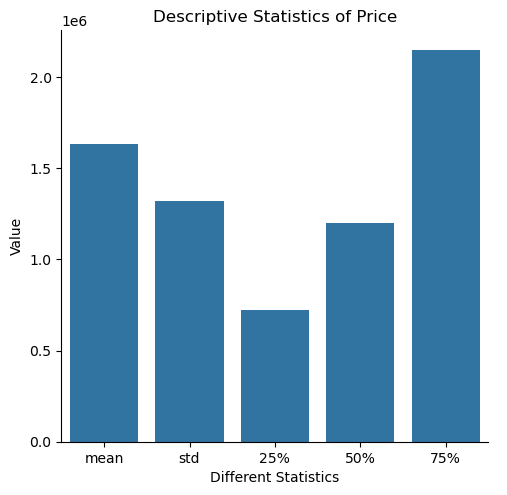

In [31]:
#printing out descriptive statistics in plotting 
price_df = updated_df['Price'].describe().reset_index()

price_df = price_df[~price_df['index'].isin(['count', 'max', 'min'])]

plt.figure(figsize=(10, 6))
sns.catplot(x="index", y="Price", data=price_df, kind="bar")
plt.title("Descriptive Statistics of Price")
plt.xlabel("Different Statistics")
plt.ylabel("Value")
plt.show()

#### Explanation

The '25', '50' and '75' show the quartile quantity for this column, with the 50% representing the median value of the column.

The mean in ths column is greater than the standard deviation value, which suggests that the data points are relatively close to the mean, meaning the data values are more uniform in nature.


#### Create a visual to compare average or ***median*** prices across different house types (House, Flat/Apartment, etc.).

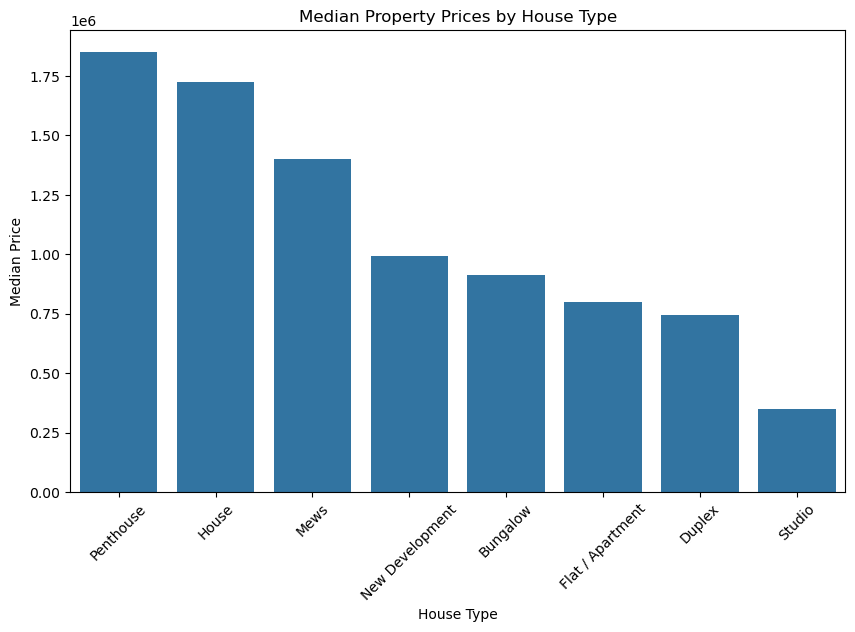

In [32]:
median_prices = updated_df.groupby('House Type')['Price'].median().reset_index()

median_prices.columns = ['House Type', 'Median Price']

median_prices = median_prices.sort_values(by='Median Price', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='House Type', y='Median Price', data=median_prices)
plt.title("Median Property Prices by House Type")
plt.xlabel("House Type")
plt.ylabel("Median Price")
plt.xticks(rotation=45)
plt.show()

#### Explanation

This data shows that Penthouse's median value is the highest, which suggests that penthouses are more expensive across all locations, compared to Studio's which had the lowest median value. 

House is very close 2nd to Penthouse, which also shows that it is also one of the more expensive property types across all locations

#### Create a visual that helps you identify ***high-value*** or budget-friendly areas by analysing average prices in various locations.

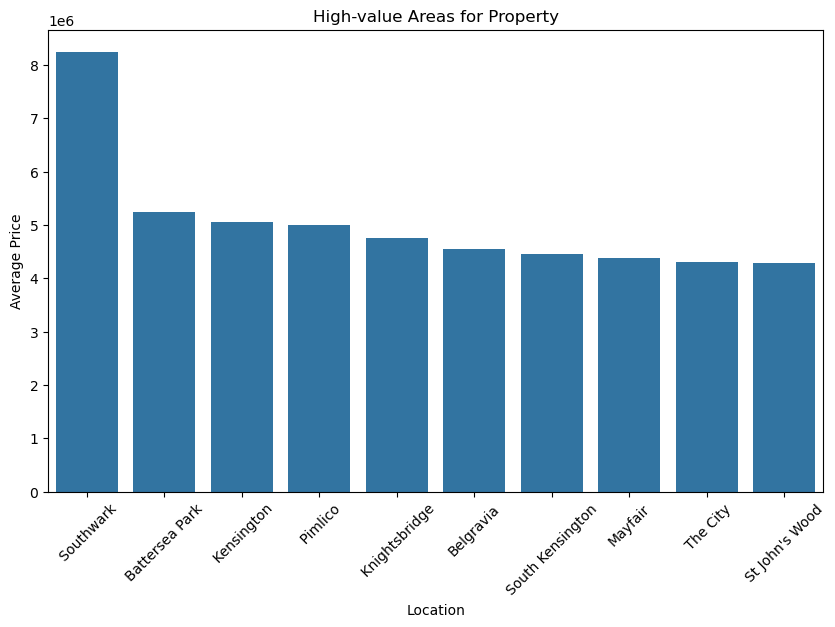

In [ ]:
#words to filter out 
keywords = ['road', 'street', 'avenue', 'close', 'thames']

#function to check if a string ends with any of the keywords
def ends_with_keywords(location):
    for keyword in keywords:
        if location.lower().endswith(keyword):
            return True
    return False

#filtering out unwanted rows from 'updated_df'
updated_df['Others'] = updated_df['Location'].apply(lambda x: ends_with_keywords(x))

#creating a new dataframe excluding rows with unwanted locations
filtered_df = updated_df[~updated_df['Others']]

#grouping by 'Location' and calculate the average price
high_value_areas = filtered_df.groupby('Location')['Price'].mean().reset_index()
high_value_areas.columns = ['Location', 'Average Price']
high_value_areas = high_value_areas.sort_values(by='Average Price', ascending=False)

#get the top 10 high-value areas
top_5_HVA = high_value_areas.head(10)

#plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Average Price', data=top_5_HVA)
plt.title("High-value Areas for Property")
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


#### Explanation:

This graph shows that Southwark is the most expensive area for property, with the subsequent columns being of similar quantities.


#### Use data visualisation to analysis the relationship between some of the following (price, area, rooms)

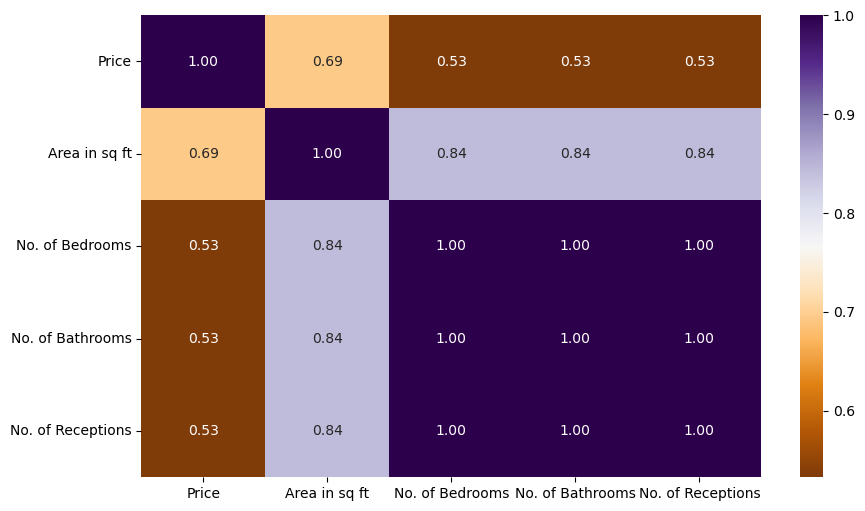

In [35]:
plt.figure(figsize=(10,6))
columns_for_relationship = ['Price','Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions']
relationship_data = updated_df[columns_for_relationship]
c = relationship_data.corr()
sns.heatmap(c, cmap="PuOr", annot=True, fmt=".2f")
plt.show()

#### Explanation

This statistical heatmap shows the correlation co-efficients between the specified variables.

Area and the quantity of bedrooms, bathrooms and receptions are highly correlated due to the nature of these variables. The number of bedrooms, for example, in a property will be dependent on the amount of space (Area in sq ft)

Area and Price are reasonably correlated, once again due to the nature of these variables. The higher the area of sq ft (the larger, the property is), the more expensive the property will be sold for.

Price and the quantity of bedrooms, bathrooms and receptions are reasonably correlated, indicating a moderate relationship

#### Create a visual of your choice that provides additional insight to that obtained in the previous tasks.

***Visualising the areas which have the highest numbers of bedrooms***

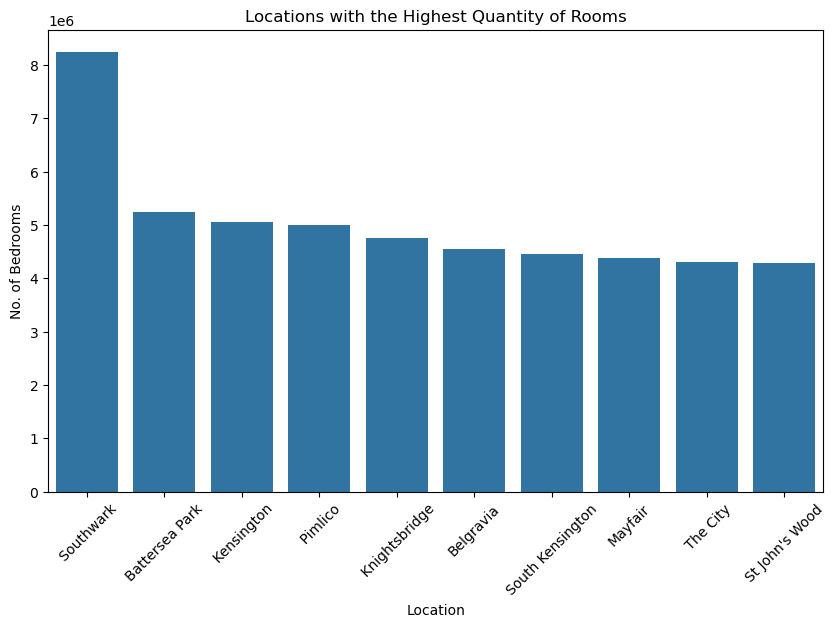

In [22]:
high_bedrooms = filtered_df.groupby('Location')['No. of Bedrooms'].mean().reset_index()
high_bedrooms.columns = ['Location', 'No. of Bedrooms']
high_bedrooms = high_bedrooms.sort_values(by='No. of Bedrooms', ascending=False)

top_5_rooms = high_bedrooms.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Average Price', data=top_5_HVA)
plt.title("Locations with the Highest Quantity of Rooms")
plt.xlabel("Location")
plt.ylabel("No. of Bedrooms")
plt.xticks(rotation=45)
plt.show()

#### Explanation

This graph emulates trends seen in the visualisation for areas with high-value property, with Southwark having the highest quantity of rooms, and the subsequent areas having similar quantities

### To do: Providing actionable suggestions based on the results of the EDA

- Further investigating into why the subsequent columns past Southwark are similar in quantity

- Investigating why a New Development is cheaper than some columns, considering that it is a new property

- Being able to map the values in 'Location' which were Road names, instead of actual geographical locations, to their corresponding location